<a href="https://colab.research.google.com/github/lutakrystal305/torch_tutorial/blob/main/Torch_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import models


In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [ ]:
resnet = models.resnet50(pretrained=True)
print(resnet)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

In [ ]:
from torchvision import transforms, datasets


transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                        mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225]
                                )
])

In [ ]:
from PIL import Image
img = Image.open("img3.jpg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1309 at 0x7F3030A15110>


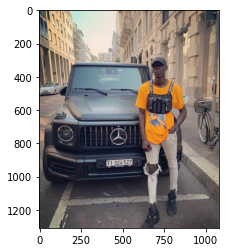

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
resnet.eval()
out = resnet(batch_t)
print(out)
print('result: ', out.argmax())

tensor([[-1.0093e+00, -3.5910e-01, -1.0085e+00, -9.9406e-01, -1.5861e-01,
         -1.7074e+00, -3.1597e+00, -4.1668e-01, -4.6061e-01, -7.7461e-01,
         -3.1310e+00, -2.0964e+00, -1.1708e+00, -2.1616e+00, -1.9940e+00,
         -2.0402e+00, -1.1994e+00,  4.8456e-02, -1.3742e+00, -1.1976e+00,
         -2.8984e+00, -2.1545e+00, -2.5423e+00,  4.7260e-01, -2.2933e+00,
         -1.1949e+00, -1.8441e+00, -1.8152e+00, -1.7881e+00, -2.6061e+00,
         -8.6445e-01, -8.4612e-01, -2.7010e-01,  4.4450e-01,  1.1415e+00,
         -9.5935e-01, -6.6635e-01, -1.8561e+00, -3.6007e-01, -7.4957e-02,
         -1.6507e+00, -1.0547e+00, -7.4898e-01, -1.7983e+00, -1.1771e+00,
         -1.3529e-01, -2.1447e+00, -2.1457e-01, -2.1818e+00, -2.3430e+00,
         -1.7386e+00,  7.9540e-01, -3.2855e-01, -3.6127e-01,  3.5474e-01,
         -7.0399e-01, -6.1847e-01, -2.0579e+00, -7.7312e-01, -2.3760e-01,
          1.2368e+00, -1.3507e+00,  3.7909e-01, -1.1196e+00, -1.1840e+00,
          3.0755e-02, -2.9123e-01, -2.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
import time
import numpy as np
import os

In [ ]:
train_transform = transforms.Compose([
                                      transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                      transforms.RandomRotation(degrees=15),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(size=224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [ ]:
train_data = CIFAR100(download=True, root='/content/', transform=train_transform)
test_data = CIFAR100(root='/content/', train=False, transform=test_transform)


Extracting /content/cifar-100-python.tar.gz to /content/


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
resnet = models.resnet50(pretrained=True)
resnet = resnet.to(device)

In [ ]:
batch_size = 32
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [ ]:
#Freeze layer 1-6
ct = 0
for child in resnet.children():
    ct+=1
    if ct<7:
        for param in child.parameters():
            param.requires_grad=False

In [ ]:
#Add layer cuối vào để phù hợp với model:
fc_inputs = resnet.fc.in_features

resnet.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 100),
    nn.LogSoftmax(dim=1)
)
resnet = resnet.to(device)
loss_fn = nn.NLLLoss()

In [ ]:
def training(model, loss_fn, optimizer, schedule, epochs=25):
    ''' Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None
    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0
        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            schedule.step()
            train_loss += loss.item()*inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_fn(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)
                if not j%100:
                  print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch
        
        avg_train_loss = train_loss/len(train_data) 
        avg_train_acc = train_acc/len(train_data)

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/len(test_data)
        avg_valid_acc = valid_acc/len(test_data)

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'model_'+str(epoch)+'.pt')
    return model, history, best_epoch

In [ ]:
epochs = 25
optimizer = optim.Adam(resnet.parameters(), lr=0.005)
schedule = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20], gamma=0.1)
trained_model, history, best_epoch = training(resnet, loss_fn, optimizer, schedule, epochs)
torch.save(history, 'history.pt')

Epoch: 1/25
Validation Batch number: 000, Validation: Loss: 4.6093, Accuracy: 0.0000
Validation Batch number: 100, Validation: Loss: 4.6110, Accuracy: 0.0000
Validation Batch number: 200, Validation: Loss: 4.5980, Accuracy: 0.0000
Validation Batch number: 300, Validation: Loss: 4.6011, Accuracy: 0.0000
Epoch : 001, Training: Loss - 4.6068, Accuracy - 1.0220%, 
		Validation : Loss - 4.6028, Accuracy - 1.2300%, Time: 671.4689s
Epoch: 2/25
Validation Batch number: 000, Validation: Loss: 4.2956, Accuracy: 0.0312
Validation Batch number: 100, Validation: Loss: 4.2585, Accuracy: 0.0312
Validation Batch number: 200, Validation: Loss: 4.3915, Accuracy: 0.0312
Validation Batch number: 300, Validation: Loss: 4.2397, Accuracy: 0.0312
Epoch : 002, Training: Loss - 4.4688, Accuracy - 2.3400%, 
		Validation : Loss - 4.2520, Accuracy - 3.5500%, Time: 671.5029s
Epoch: 3/25
Validation Batch number: 000, Validation: Loss: 4.0662, Accuracy: 0.0312
Validation Batch number: 100, Validation: Loss: 3.9722, A

In [ ]:
if torch.cuda.is_available():
    print(True)

True
